In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


In [11]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


In [12]:
init_range=0.1
weights=np.random.uniform(-init_range,init_range,size=(2,1))
bias=np.random.uniform(-init_range,init_range,size=1)
print(weights)
print(bias)

[[-0.01238688]
 [ 0.02376936]]
[0.06110268]


In [13]:
learning_rate=0.02

In [14]:
for i in range(100):
    outputs=np.dot(inputs,weights)+bias
    deltas=outputs-targets
    loss=np.sum(deltas**2)/2/observations
    print(loss)
    delta_scaled=deltas/observations
    weights=weights-learning_rate*np.dot(inputs.T,delta_scaled)
    bias=bias-learning_rate*np.sum(delta_scaled)

229.96611378894275
37.68004713217917
14.54640172199778
11.405808113304072
10.654334254580695
10.202468406315239
9.8007304920975
9.418757747113599
9.052372245295624
8.700550033734595
8.362665677780802
8.038161425428704
7.7265067586186404
7.427192784257353
7.139730834216465
6.863651599208798
6.598504354393778
6.343856222542546
6.099291467207839
5.864410813981893
5.638830798642591
5.422183141112753
5.214114144209065
5.014284116198978
4.822366816222786
4.6380489216754555
4.461029516678751
4.29101960080842
4.127741617274497
3.9709289997843618
3.8203257373488126
3.6756859563206152
3.5367735189832272
3.4033616380342906
3.2752325063345578
3.152176941317742
3.0339940434807833
2.9204908683969726
2.811482111716465
2.7067898066399274
2.6062430333714
2.5096776400760525
2.4169359748872394
2.327866628525365
2.2423241871083377
2.160168994750065
2.0812669255593987
2.005489164667309
1.9327119979247926
1.8628166099281707
1.795688890042031
1.7312192461031513
1.669302425501237
1.6098373433443616
1.55272691

In [15]:
print(weights,bias)

[[ 2.00141892]
 [-3.00282554]] [4.3641321]


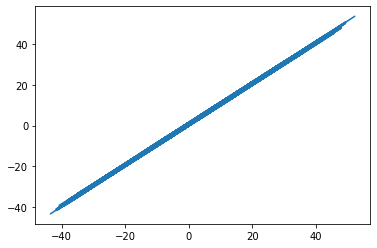

In [16]:
plt.plot(outputs,targets)